In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('./../lib')

from equation import Equation
from solver import Solver

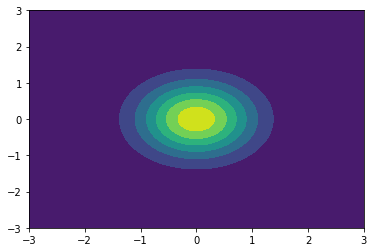

In [2]:
# Equation parameters

d = 1
q = 1
m = 1

A = np.array([
    [2.0],
])
B = np.array([
    [3.0]
])

def s(t, x): return B@x
def f(t, x): return A@x
def fx(t, x): return A

t_min = 0.
t_max = 1.
t_poi = 100

x0 = np.array([1.0])

def xr(t, w): return x0 * np.exp(B*w + (A-0.5*B*B)*t)

x_min = -3.
x_max = +3.
x_poi = 1000

x_ = np.linspace(x_min, x_max, x_poi)
x1, x2 = np.meshgrid(x_, x_)
x_ = np.array([x1, x2])
x_ = x_.reshape((2, -1))
r0 = np.einsum('ik,ik->k', x_, x_)
r0 = np.exp(-r0)
plt.contourf(x1, x2, r0.reshape((x_poi, x_poi)))
plt.show()

In [3]:
EQ = Equation(x0, r0, d, q, m)
EQ.init_t_lim(t_min, t_max, t_poi)
EQ.init_x_lim(x_min, x_max, x_poi)
EQ.init_funcs(s, f, fx, xr)
EQ.prep()

In [4]:
SL = Solver(EQ)
SL.solve_ode()

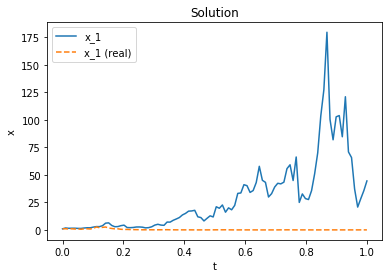

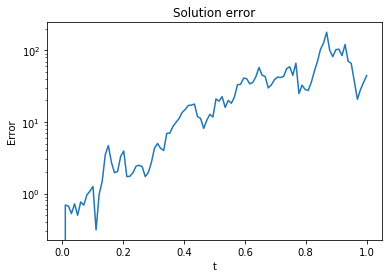

In [5]:
EQ.plot_x_vs_t()
EQ.plot_x_err_vs_t()